## Breast Cancer Dataset - Decision Tree Classifier

- 1. Load breast cancer dataset from sklearn. load_breast_cancer() from sklearn.datasets.
- 2. Target variable here is whether the patient was identified with brest cancer or not.  Use .target attribute of the dataset to get the target variable
- 3. Acquire the predictor data using the .data attribute on the dataset
- 4. Using sklearn.model_selection.train_test_split, split the data into training and testing sets. 
    - Use 70:30 train:test split and random_state=9001
    - stratify the target feature labels so we have an equal distribution in train and test sets
- 5. Fit a DecisionTreeClassifier on the training data. 
    - Set max_depth=3 to fix the depth of the tree
    - Use random_state=9001
    - Fit the tree on training set 
- 6. Make predictions using .predict() on the test set
- 7. Print the confusion matrix to understand the performance better
- 8. Obtain a classification report containing such as accuracy, precision, recall on this data; you can use classification_report from sklearn.metrics
- 9. You can plot the decision tree using the plot_tree() function from sklearn.tree.

For questions 6, 7: these are therotical questions. 

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer

In [18]:
data_bc = load_breast_cancer()
print(f"Feature Names: {data_bc.feature_names}")
print(f"\nTarget Classes: {data_bc.target_names}")
print(f"\nPredictor Data: {data_bc.data[:5]}")

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Classes: ['malignant' 'benign']

Predictor Data: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 

In [19]:
# Acquire the predictor data using the .data attribute on the dataset

X_bc = pd.DataFrame(data_bc.data, columns=data_bc.feature_names)
y_bc = pd.Series(data_bc.target)  # 0: malignant, 1: benign


In [7]:
X_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
y_bc.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: None
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [9]:
X_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y_bc.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [16]:
X_bc.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [17]:
X_bc.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [21]:
# Using sklearn.model_selection.train_test_split, split the data into training and testing sets. 
#    - Use 70:30 train:test split and random_state=9001
#    - stratify the target feature labels so we have an equal distribution in train and test sets

X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.3, stratify=y_bc, random_state=9001)
print(f"Training set shape: {X_bc_train.shape}, {y_bc_train.shape}")
print(f"Testing set shape: {X_bc_test.shape}, {y_bc_test.shape}")

Training set shape: (398, 30), (398,)
Testing set shape: (171, 30), (171,)


In [22]:
# 5. Fit a DecisionTreeClassifier on the training data. 
#    - Set max_depth=3 to fix the depth of the tree
#    - Use random_state=9001
#    - Fit the tree on training set 

dtree = DecisionTreeClassifier(max_depth=3, random_state=9001)
dtree.fit(X_bc_train, y_bc_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,9001
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
# 6. Make predictions using .predict() on the test set
y_bc_train_pred = dtree.predict(X_bc_train)
y_bc_test_pred = dtree.predict(X_bc_test)


Confusion Matrix Training vs Test :


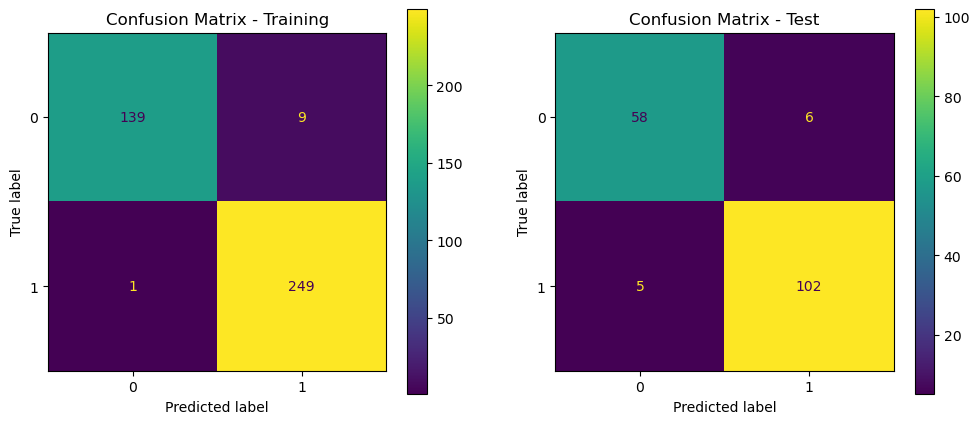

In [ ]:
# 7. Print the confusion matrix to understand the performance better

print(f"Confusion Matrix Training vs Test :")
fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_train = confusion_matrix(y_bc_train, y_bc_train_pred)
ConfusionMatrixDisplay(cm_train, display_labels=dtree.classes_).plot(ax=axes[0])
axes[0].set_title("Confusion Matrix - Training")

cm_test = confusion_matrix(y_bc_test, y_bc_test_pred)
ConfusionMatrixDisplay(cm_test, display_labels=dtree.classes_).plot(ax=axes[1])
axes[1].set_title("Confusion Matrix - Test")
plt.show()

In [36]:
# 8. Obtain a classification report containing such as accuracy, precision, recall on this data; you can use classification_report from sklearn.metrics

from sklearn.metrics import f1_score


print("Training Set Classification Report:")
print(classification_report(y_bc_train, y_bc_train_pred, target_names=data_bc.target_names))

print("Test Set Classification Report:")
print(classification_report(y_bc_test, y_bc_test_pred, target_names=data_bc.target_names))  

training_accuracy = accuracy_score(y_bc_train, y_bc_train_pred)
test_accuracy = accuracy_score(y_bc_test, y_bc_test_pred)
training_recall = recall_score(y_bc_train, y_bc_train_pred, pos_label=1)
test_recall = recall_score(y_bc_test, y_bc_test_pred, pos_label=1)
training_specificity = recall_score(y_bc_train, y_bc_train_pred, pos_label=0)
test_specificity = recall_score(y_bc_test, y_bc_test_pred, pos_label=0)
training_f1 = f1_score(y_bc_train, y_bc_train_pred, pos_label=1)
test_f1 = f1_score(y_bc_test, y_bc_test_pred, pos_label=1)

print(f"\nTraining | Test Accuracy: {training_accuracy:.4f} | {test_accuracy:.4f}")
print(f"Training | Test Recall: {training_recall:.4f} | {test_recall:.4f}")
print(f"Training | Test Specificity: {training_specificity:.4f} | {test_specificity:.4f}")
print(f"Training | Test F1 Score: {training_f1:.4f} | {test_f1:.4f}")

Training Set Classification Report:
              precision    recall  f1-score   support

   malignant       0.99      0.94      0.97       148
      benign       0.97      1.00      0.98       250

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.97      0.97       398

Test Set Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Training | Test Accuracy: 0.9749 | 0.9357
Training | Test Recall: 0.9960 | 0.9533
Training | Test Specificity: 0.9392 | 0.9062
Training | Test F1 Score: 0.9803 | 0.9488


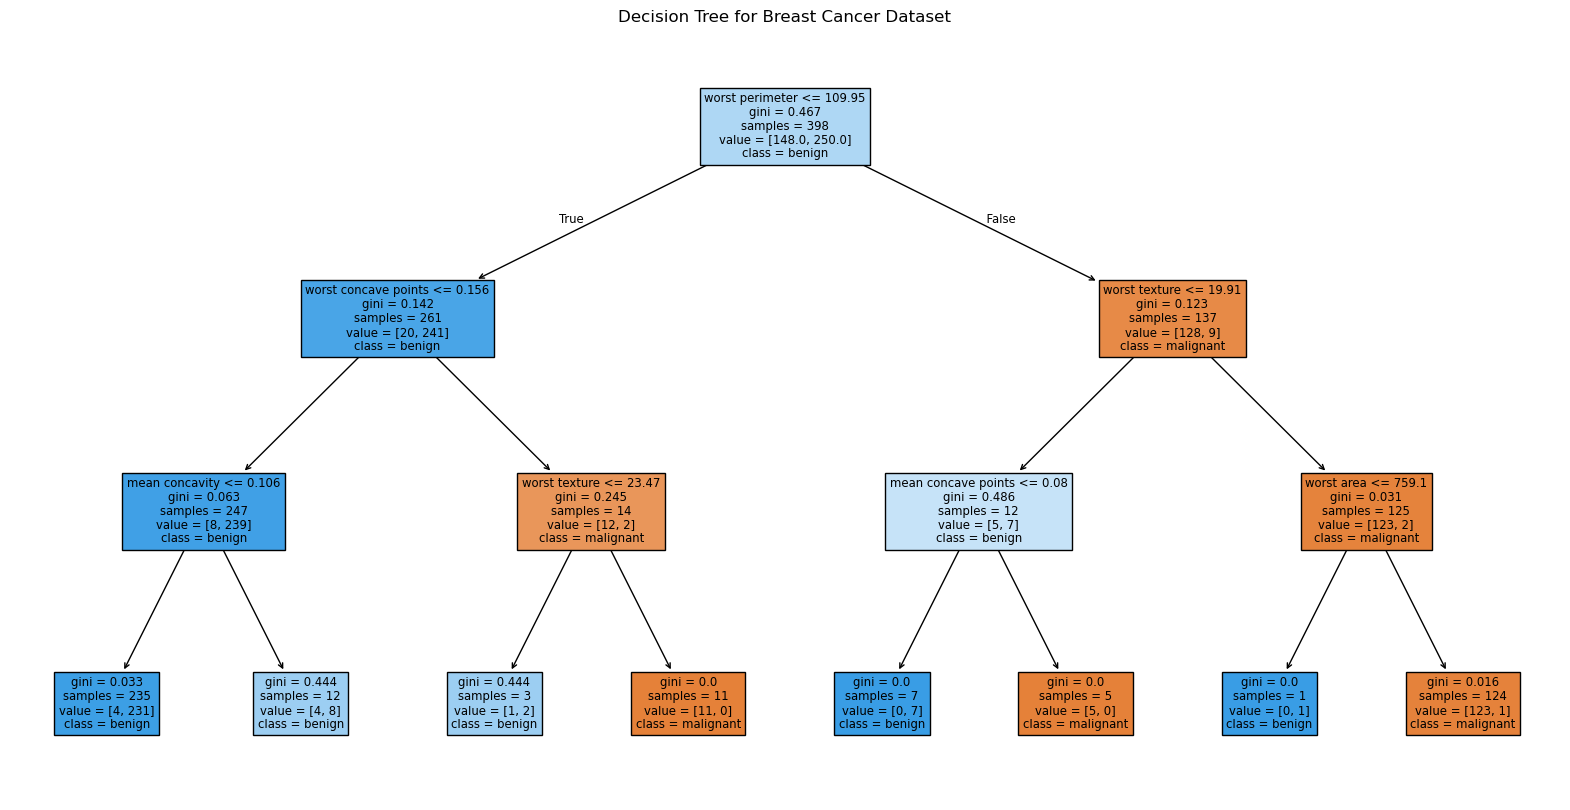

In [41]:
# 9. You can plot the decision tree using the plot_tree() function from sklearn.tree.

plt.figure( figsize=(20,10))

plot_tree(dtree,
         feature_names=X_bc.columns, 
         class_names=data_bc.target_names, 
         filled=True)
plt.title("Decision Tree for Breast Cancer Dataset")
plt.show()

----

In [ ]:
# Hyperparameter tuning using GridSearchCV for max_depth, min_samples_split and ccp_alpha

param_grid = {
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split' : [2, 5, 10, 15, 20],
    'ccp_alpha' : [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=9001),
                           param_grid=param_grid,
                           scoring='recall',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_bc_train, y_bc_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Recall Score: {grid_search.best_score_:.4f}")

best_tree = grid_search.best_estimator_
y_bc_train_best_pred = best_tree.predict(X_bc_train)
y_bc_test_best_pred = best_tree.predict(X_bc_test)

# Evaluate the best model

print("Training Set Classification Report:")
print(classification_report(y_bc_train, y_bc_train_best_pred, target_names=data_bc.target_names))

print("Test Set Classification Report:")
print(classification_report(y_bc_test, y_bc_test_best_pred, target_names=data_bc.target_names))  

bt_training_accuracy = accuracy_score(y_bc_train, y_bc_train_best_pred)
bt_test_accuracy = accuracy_score(y_bc_test, y_bc_test_best_pred)
bt_training_recall = recall_score(y_bc_train, y_bc_train_best_pred, pos_label=1)
bt_test_recall = recall_score(y_bc_test, y_bc_test_best_pred, pos_label=1)
# Specificity = Recall of the negative (malignant) class
bt_training_specificity = recall_score(y_bc_train, y_bc_train_best_pred, pos_label=0)
bt_test_specificity = recall_score(y_bc_test, y_bc_test_best_pred, pos_label=0)
bt_training_f1 = f1_score(y_bc_train, y_bc_train_best_pred, pos_label=1)
bt_test_f1 = f1_score(y_bc_test, y_bc_test_best_pred, pos_label=1)

print(f"\nTraining | Test Accuracy: {bt_training_accuracy:.4f} | {bt_test_accuracy:.4f}")
print(f"Training | Test Recall: {bt_training_recall:.4f} | {bt_test_recall:.4f}")
print(f"Training | Test Specificity: {bt_training_specificity:.4f} | {bt_test_specificity:.4f}")
print(f"Training | Test F1 Score: {bt_training_f1:.4f} | {bt_test_f1:.4f}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 3, 'min_samples_split': 2}
Best Cross-validation Recall Score: 0.9680
Training Set Classification Report:
              precision    recall  f1-score   support

   malignant       0.99      0.94      0.97       148
      benign       0.97      1.00      0.98       250

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.97      0.97       398

Test Set Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Training | Test Accuracy: 0.9749 | 0.9357
Training | Test Recall: 0.9960 | 0.9533
Training | T

#### Medical Diagnosis & Classification Metrics
- In breast cancer detection, the classes are:
    - 0 = malignant (disease present)
    - 1 = benign (no disease)

Types of Errors
- False Negative (FN): Patient has cancer (malignant = 0) but model predicts benign (1).
    - ⚠️ Very dangerous → missed diagnosis → delayed treatment.
- False Positive (FP): Patient is healthy (benign = 1) but model predicts malignant (0).
    - ⚠️ Less dangerous → extra tests, stress, cost → but not life-threatening.

Which metric matters most?
- Accuracy: Not enough. If dataset is imbalanced (more benign than malignant), a model could just predict "benign" for everyone and still get high accuracy.
- Recall (a.k.a. Sensitivity or True Positive Rate for malignant class):
    - Measures: Of all malignant patients, how many did we catch?
    - Formula: TP / (TP + FN)
    - High recall = fewer false negatives → safer diagnosis.
- Specificity (True Negative Rate):
    - Measures: Of all benign patients, how many did we correctly call benign?
    - In cancer screening, specificity is important but secondary.
- Precision (Positive Predictive Value):
    - Of those we flagged as malignant, how many actually had cancer?
    - Important to reduce unnecessary biopsies, but in screening, recall usually dominates.

So in Breast Cancer Detection:
- Primary metric = Recall (for malignant class) → catch as many cancers as possible.
- Secondary metrics = Specificity & Precision → balance cost of false positives.
- F1-score (harmonic mean of precision and recall) is also useful, but recall is king in medical contexts.

---------

**Q1. What is the accuracy score on the test set from max_depth=3 code?**

A1. The accuracy score on the test set is approximately 0.94.

**Q2. Based on confusion matrix how many cases of malignant tumors were wrongly predicted as benign in the test set with max_depth=3 tree?**
- True Malignant = 64 cases (58 + 6)
- Out of those, **6 malignant tumors were predicted as benign (false negatives)**.

| True label ↓ / Predicted label → | 0 (malignant) | 1 (benign) |
| -------------------------------- | ------------- | ---------- |
| **0 (malignant)**                | **58**        | **6**      |
| **1 (benign)**                   | 5             | 102        |


**Q3. According to the classification report, what is the recall of the malignant class?**

Recall = True Positives / (True Positives + False Negatives).

Out of 64 malignant tumors in the test set, the model correctly identified 58 and missed 6.
- 58 / (58 + 6) = 91
- ✅ So the recall for malignant tumors is **0.91 (91%)**.


**Q4. How does the decision tree split the very first node according to the visualization?**
- worst perimeter < 109.95


**Q5. What does the value gini = 0.0 in a decision tree node indicate?**
- the node contains only 1 class
- the node contains a perfectly balanced mix
- node offers no information for splitting
- tree will stop growing normally at this node

**Answer: node contains only 1 class**

Recall:

Gini impurity = 1−∑pi^2
- pi are class proportions in the node.

Range:
- 0.0 → perfectly pure (all samples are of one class).
- Higher values (max near 0.5 for binary classes, or more for multi-class) → more mixed.
- So when you see gini = 0.0 in a node:
- It means the node is pure → contains samples from only one class.
- That’s why the tree doesn’t need to split further (splitting would not reduce impurity).

**Q6. what is the primary objective when choosing the split at any node in a decision tree?**
- to maximize number of samples in each child node
- to increase computational complexity
- to maximize seperation (purity) between classes
- to ensure all nodes have same number of samples

**Answer: to maximize seperation (purity) between classes**

- this goes right to the heart of how decision trees decide where to split.
- At each node, the algorithm:
    - Tests possible splits on each feature.
    - Calculates the impurity of the resulting child nodes (using Gini, Entropy, or MSE depending on classification/regression).
    - Chooses the split that produces the largest decrease in impurity → i.e. the most class-pure separation.

**Q7. How is information gain calculated when splitting a node?**
- Difference in gini impurity before and after
- Difference between entropy of the first subnode and second subnode
- Difference between entropy of the parent and average entropy of the children nodes
- Difference in parent node entropy and sum of all probabilities in the children nodes

**Answer: Difference between entropy of the parent and average entropy of the children nodes**

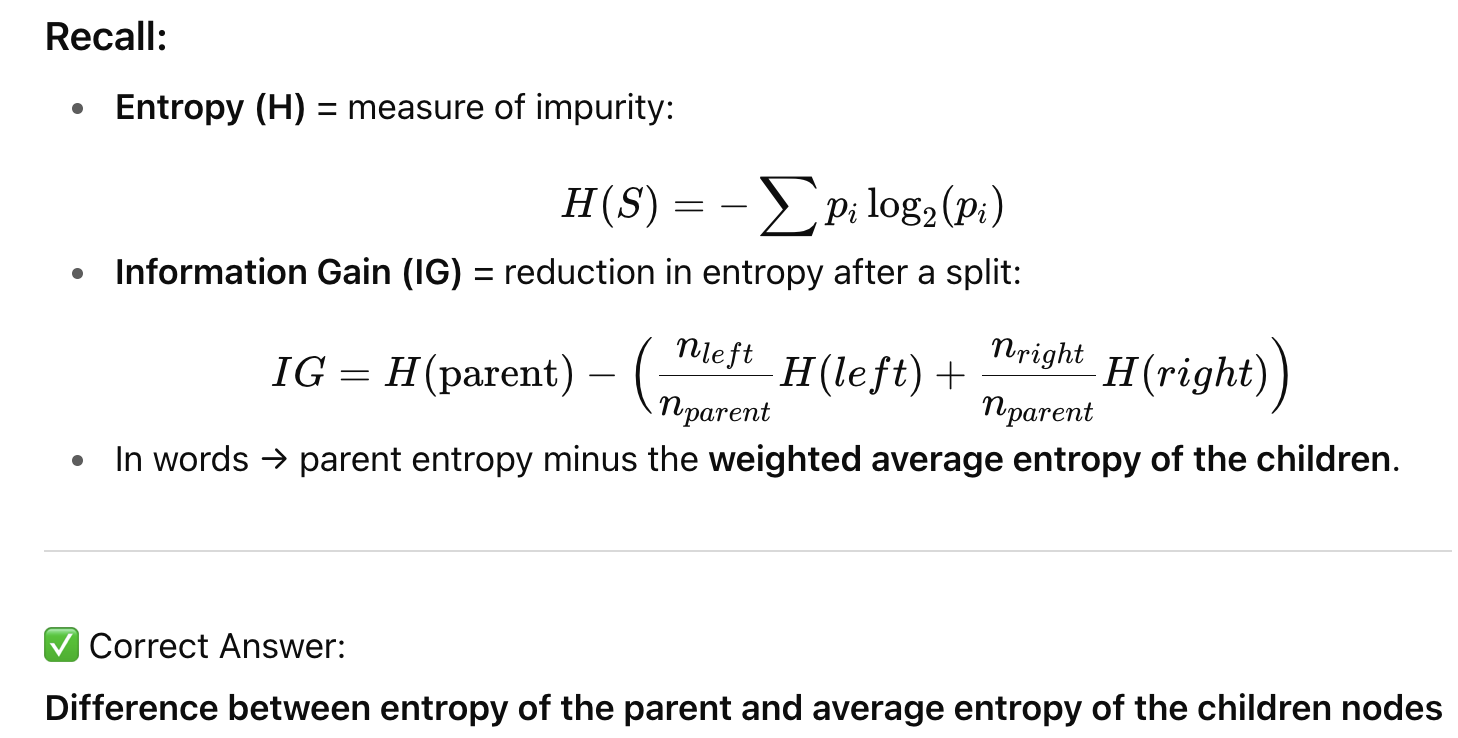